In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
n_ensemble = 200
x_size = 10
y_size = 10
ensemble = np.random.rand(n_ensemble,361,4)
ensemble[:,:,0:2] *= x_size/4
ensemble[:,:,0:2] -= x_size/8
ensemble[:,:,0:2] = np.mod(ensemble[:,:,0:2], 10)
ensemble[:,:,2] = 0.03
ensemble[:,:,3] *= np.pi*2


In [26]:
def periodic_distant_vectors(vectors, x_size, y_size):
    
    vectors[:,:,0] = np.where(vectors[:,:,0]>x_size/2,vectors[:,:,0]-x_size,vectors[:,:,0])
    vectors[:,:,0] = np.where(vectors[:,:,0]<-x_size/2,vectors[:,:,0]+x_size,vectors[:,:,0])
    vectors[:,:,1] = np.where(vectors[:,:,1]>y_size/2,vectors[:,:,1]-y_size,vectors[:,:,1])
    vectors[:,:,1] = np.where(vectors[:,:,1]<-y_size/2,vectors[:,:,1]+y_size,vectors[:,:,1])
    
    return vectors

In [32]:
p1 = ensemble[0,:,:]

dists = ensemble - p1

# apply pbc to dist
dists[:,:,0:2] = periodic_distant_vectors(dists[:,:,0:2], x_size,y_size)

#dists[:,:,0:2] = np.mod(dists[:,:,0:2], x_size)
dists[:,:,3] = np.mod(dists[:,:,3], 2*np.pi)

average = p1 + 1/(n_ensemble-1) * np.sum(dists,axis=0)

average[:,0] = np.mod(average[:,0], x_size)
average[:,1] = np.mod(average[:,1], y_size)

In [33]:
dists.shape

(200, 361, 4)

In [34]:
average.shape

(361, 4)

In [35]:
simple_av = np.mean(ensemble, axis=0)


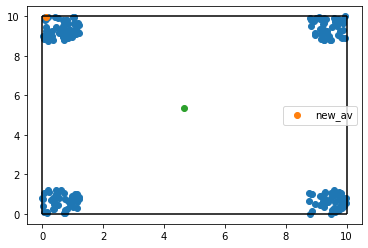

In [36]:
plt.figure()

plt.vlines([0,x_size], 0, y_size, colors='black')
plt.hlines([0,y_size], 0, x_size, colors='black')
plt.scatter(ensemble[:,0,0],ensemble[:,0,1])
plt.scatter(average[0,0], average[0,1], label="new_av")
plt.scatter(simple_av[0,0], simple_av[0,1])

plt.legend()
plt.show()